# Pratical Machine Learning 
## Fátima Vilela Candal

# Import Libraries



In [52]:
# Importing Libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import math

from sklearn.model_selection import train_test_split 
from sklearn import metrics 


from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier 


from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

# Download Data 
### The original training and test data has 160 variables. 
### The columns with NA entries have been removed. Five (5) variables were removed.

In [53]:
# Importing the Dataset 
df = pd.read_csv('pml-training.csv')

In [54]:
# Clear all null data
df.dropna(inplace=True)

In [55]:
# Total rows and columns 
print("Train data line and colum: {}".format(df.shape))

Train data line and colum: (406, 160)


In [56]:
# Columns present in the dataset 
print(df.columns) 

Index(['Unnamed: 0', 'user_name', 'raw_timestamp_part_1',
       'raw_timestamp_part_2', 'cvtd_timestamp', 'new_window', 'num_window',
       'roll_belt', 'pitch_belt', 'yaw_belt',
       ...
       'gyros_forearm_x', 'gyros_forearm_y', 'gyros_forearm_z',
       'accel_forearm_x', 'accel_forearm_y', 'accel_forearm_z',
       'magnet_forearm_x', 'magnet_forearm_y', 'magnet_forearm_z', 'classe'],
      dtype='object', length=160)


In [57]:
# Data types
df.dtypes

Unnamed: 0                   int64
user_name                   object
raw_timestamp_part_1         int64
raw_timestamp_part_2         int64
cvtd_timestamp              object
new_window                  object
num_window                   int64
roll_belt                  float64
pitch_belt                 float64
yaw_belt                   float64
total_accel_belt             int64
kurtosis_roll_belt          object
kurtosis_picth_belt         object
kurtosis_yaw_belt           object
skewness_roll_belt          object
skewness_roll_belt.1        object
skewness_yaw_belt           object
max_roll_belt              float64
max_picth_belt             float64
max_yaw_belt                object
min_roll_belt              float64
min_pitch_belt             float64
min_yaw_belt                object
amplitude_roll_belt        float64
amplitude_pitch_belt       float64
amplitude_yaw_belt          object
var_total_accel_belt       float64
avg_roll_belt              float64
stddev_roll_belt    

In [58]:
# Presentation of null data 
df.isnull().sum()

Unnamed: 0                 0
user_name                  0
raw_timestamp_part_1       0
raw_timestamp_part_2       0
cvtd_timestamp             0
new_window                 0
num_window                 0
roll_belt                  0
pitch_belt                 0
yaw_belt                   0
total_accel_belt           0
kurtosis_roll_belt         0
kurtosis_picth_belt        0
kurtosis_yaw_belt          0
skewness_roll_belt         0
skewness_roll_belt.1       0
skewness_yaw_belt          0
max_roll_belt              0
max_picth_belt             0
max_yaw_belt               0
min_roll_belt              0
min_pitch_belt             0
min_yaw_belt               0
amplitude_roll_belt        0
amplitude_pitch_belt       0
amplitude_yaw_belt         0
var_total_accel_belt       0
avg_roll_belt              0
stddev_roll_belt           0
var_roll_belt              0
                          ..
max_roll_forearm           0
max_picth_forearm          0
max_yaw_forearm            0
min_roll_forea

In [59]:
# Data presented 20 columns and 05 rows
df.head(5)

,Unnamed: 0,user_name,raw_timestamp_part_1,raw_timestamp_part_2,cvtd_timestamp,new_window,num_window,roll_belt,pitch_belt,yaw_belt,...,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,classe
23,24,carlitos,1323084232,996313,05/12/2011 11:23,yes,12,1.51,8.10,-94.40,...,0.03,-0.03,0.00,193,203,-213,-11,661.0,470.0,A
51,52,carlitos,1323084233,948290,05/12/2011 11:23,yes,13,1.27,7.56,-94.10,...,0.02,0.00,-0.05,190,207,-216,-10,653.0,467.0,A
75,76,carlitos,1323084234,984276,05/12/2011 11:23,yes,14,1.18,7.26,-94.10,...,0.06,0.00,0.03,192,205,-213,-5,653.0,475.0,A
164,165,carlitos,1323084238,972281,05/12/2011 11:23,yes,18,1.01,7.38,-93.80,...,0.02,0.00,-0.02,195,205,-213,-10,653.0,475.0,A
209,210,pedro,1323094970,968279,05/12/2011 14:22,yes,47,129.00,27.90,2.35,...,0.18,0.03,-0.03,158,228,-184,-153,753.0,673.0,A


In [60]:
# Descriptive statistics for each column
df.describe()

,Unnamed: 0,raw_timestamp_part_1,raw_timestamp_part_2,num_window,roll_belt,pitch_belt,yaw_belt,total_accel_belt,max_roll_belt,max_picth_belt,...,var_yaw_forearm,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z
count,406.000000,4.060000e+02,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,...,406.000000,406.000000,406.00000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000
mean,10091.330049,1.322828e+09,971714.034483,446.524631,68.164409,0.475123,-8.515911,11.812808,-6.667241,12.923645,...,4639.849068,0.139015,0.07734,0.115739,-76.591133,152.142857,-58.719212,-327.344828,355.830049,402.960591
std,5721.085942,1.965068e+05,47632.942142,249.431290,62.918868,22.444911,94.044798,7.701815,94.594252,8.005960,...,7284.972361,0.658534,2.18122,0.710057,179.796319,201.498079,132.719848,341.141163,498.486101,350.169283
min,24.000000,1.322490e+09,492326.000000,2.000000,-27.800000,-51.600000,-175.000000,1.000000,-94.300000,3.000000,...,0.000000,-3.080000,-5.49000,-7.940000,-464.000000,-406.000000,-329.000000,-1270.000000,-835.000000,-955.000000
25%,5283.500000,1.322673e+09,968313.250000,228.500000,1.150000,1.412500,-88.200000,4.000000,-88.000000,5.000000,...,0.274550,-0.240000,-1.40750,-0.175000,-187.500000,39.500000,-181.000000,-617.500000,-59.750000,240.500000
50%,10303.000000,1.322833e+09,982650.500000,464.500000,116.000000,5.385000,-6.705000,17.000000,-5.100000,18.000000,...,612.214225,0.030000,0.05000,0.075000,-64.000000,162.000000,-37.500000,-416.500000,573.000000,512.000000
75%,15055.500000,1.323084e+09,992286.250000,665.500000,123.000000,15.525000,14.500000,18.000000,18.500000,19.000000,...,7368.414252,0.660000,1.55000,0.480000,50.750000,304.750000,20.000000,-97.250000,724.750000,657.750000
max,19622.000000,1.323095e+09,998801.000000,864.000000,161.000000,60.000000,177.000000,27.000000,180.000000,30.000000,...,39009.333330,1.560000,5.64000,2.230000,276.000000,583.000000,254.000000,655.000000,1450.000000,953.000000


# Train Test Split
### We will divide our dataset into training and test splits, which gives us a better idea as to how our algorithm performed during the testing phase. 
### This way our algorithm is tested on un-seen data, as it would be in a production application.

In [61]:
# Preprocessing
# The next step is to split our dataset into its attributes and labels

cols = ['raw_timestamp_part_1',
'raw_timestamp_part_2',
'num_window',
'roll_belt',
'pitch_belt',
'yaw_belt',
'gyros_forearm_x',
'gyros_forearm_y',
'gyros_forearm_z',
'accel_forearm_x',
'accel_forearm_y',
'accel_forearm_z',
'magnet_forearm_x',
'magnet_forearm_y',
'magnet_forearm_z']


X = df[cols]
y = df.classe

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=0) 


In [62]:
print (X_train.shape)

(284, 15)


In [63]:
print (X_test.shape)

(122, 15)


#  Model
### The first step is to import the DecisionTreeClassifier class from the sklearn.neighbors library. 
### In the second line, this class is initialized with one parameter.  
### This is basically the value for the K. There is no ideal value for K and it is selected after testing and evaluation, however to start out, 5 seems to be the most commonly used value for DECISION TREE algorithm.
### After all the work of data preparation, creating and training the model DECISION TREE regression model and fit  the model on the training data. 

# Predictions
### It is extremely straight forward to train the DECISION TREE  algorithm and make predictions.

In [64]:
# Tree classifer 
clf = DecisionTreeClassifier()

# Decision Tree Classifer
clf = clf.fit(X_train,y_train)

# prever conjunto de testes
y_predc = clf.predict(X_test)
y_predc

array(['B', 'B', 'D', 'C', 'B', 'D', 'C', 'C', 'C', 'A', 'E', 'E', 'E',
       'E', 'C', 'B', 'B', 'C', 'D', 'A', 'E', 'D', 'C', 'C', 'B', 'D',
       'E', 'D', 'C', 'E', 'B', 'B', 'B', 'D', 'A', 'A', 'D', 'A', 'B',
       'A', 'E', 'D', 'E', 'B', 'C', 'A', 'D', 'D', 'D', 'A', 'B', 'C',
       'C', 'A', 'B', 'A', 'C', 'D', 'A', 'A', 'C', 'A', 'A', 'A', 'D',
       'C', 'C', 'E', 'E', 'E', 'A', 'E', 'B', 'E', 'A', 'A', 'B', 'A',
       'B', 'C', 'D', 'C', 'D', 'A', 'D', 'B', 'A', 'D', 'C', 'C', 'D',
       'C', 'E', 'E', 'E', 'E', 'D', 'E', 'A', 'C', 'C', 'E', 'B', 'C',
       'D', 'C', 'D', 'A', 'D', 'E', 'E', 'E', 'A', 'D', 'E', 'C', 'C',
       'A', 'B', 'A', 'B', 'A'], dtype=object)

# Evaluating the Algorithm
### For evaluating an algorithm, confusion matrix, precision, recall and score are the most commonly used metrics. 

In [68]:
from sklearn.metrics import classification_report, confusion_matrix
print("CONFUSION MATRIX")
print(confusion_matrix(y_test, y_predc))
print("")
print("METRICS")
print(classification_report(y_test, y_predc))
print("")

#Cria a árvore de decisão e calcula a curácia
print("ACCURACY")
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test,y_test)

CONFUSION MATRIX
[[22  3  7  6  0]
 [ 2 13  6  1  0]
 [ 0  2 12  2  0]
 [ 2  0  1 14  0]
 [ 1  2  1  1 24]]

METRICS
              precision    recall  f1-score   support

           A       0.81      0.58      0.68        38
           B       0.65      0.59      0.62        22
           C       0.44      0.75      0.56        16
           D       0.58      0.82      0.68        17
           E       1.00      0.83      0.91        29

   micro avg       0.70      0.70      0.70       122
   macro avg       0.70      0.71      0.69       122
weighted avg       0.75      0.70      0.71       122


ACCURACY


0.6311475409836066

# Error Rate 
### In the training and prediction section we said that there is no way to know beforehand which value of K that yields the best results in the first go. 

### One way find the best value of K is to plot the graph of K value and the corresponding error rate for the dataset.

### We will plot the mean error for the predicted values of test set for all the K values between 1 and 40.

In [75]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    cfli = DecisionTreeClassifier()
    cfli.fit(X_train, y_train)
    pred_i =  cfli.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

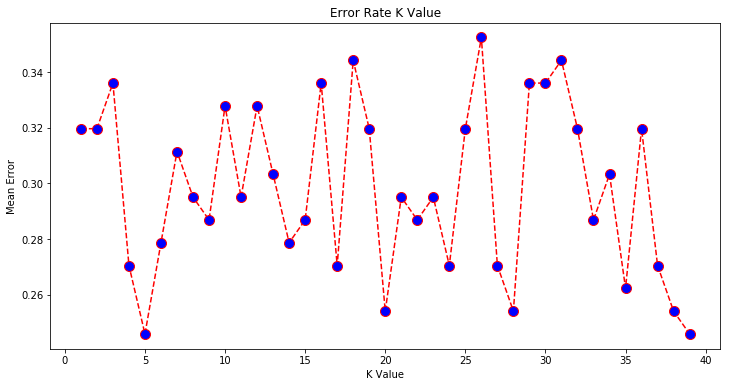

In [76]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

# Conclusion



### DECISION TREE is a simple yet powerful classification algorithm. 
### It requires no training for making predictions, which is typically one of the most difficult parts of a machine learning algorithm. 
### The DECISION TREE algorithm have been widely used to find document similarity and pattern recognition.
### It has also been employed for developing recommender systems and for dimensionality reduction and pre-processing steps 
### for computer vision, particularly face recognition tasks.

